# MPSLIB in Google Colab
This is a simple exmaple of running MPSLIB online in Google Colab

## INSTALL MPSLIB (simple) (only needed once on google colab)

In [13]:
module_name='mpslib'
try:
    __import__(module_name)
    print('%s allready installed. skipping installation.' % module_name)
        
except ImportError:
    if (show_info>0):
        print('%s cannot be loaded. trying to install it.' % module_name)
        !curl -O https://raw.githubusercontent.com/ergosimulation/mpslib/master/install_latest_mpslib.sh
        !sh ./install_latest_mpslib.sh
        

mpslib allready installed. skipping installation.


##INSTALL MPSLIB (only needed once on google colab)

In [0]:
import os

In [15]:
# Get code from GITHUB
!rm -fr mpslib && git clone https://github.com/ergosimulation/mpslib.git
# Compile
os.chdir('/content/mpslib')
#!make

Cloning into 'mpslib'...
remote: Enumerating objects: 360, done.
remote: Counting objects: 100% (360/360), done.
remote: Compressing objects: 100% (258/258), done.
remote: Total 3012 (delta 227), reused 219 (delta 101), pack-reused 2652
Receiving objects: 100% (3012/3012), 23.79 MiB | 25.04 MiB/s, done.
Resolving deltas: 100% (2072/2072), done.


### Install scikit mps (Pyhton interface to MPSlib)

In [4]:
os.chdir('/content/mpslib/scikit-mps')
!pip install -e .

Obtaining file:///content/mpslib/scikit-mps
  Found existing installation: scikit-mps 0.1.0
    Can't uninstall 'scikit-mps'. No files were found to uninstall.
  Running setup.py develop for scikit-mps


### Install vista (for 3D plotting)

In [5]:
!pip install vista

# MPSLIB IN PYTHON

In [0]:
import mpslib as mps
import numpy as np
import matplotlib.pyplot as plt

In [7]:
O = mps.mpslib(method='mps_snesim_tree',
                    n_real = 4, verbose_level=-1)
O.parameter_filename = 'mps_snesim.txt'
O.par['debug_level']=-1
O.par['n_cond']=9
O.par['simulation_grid_size']=np.array([50,80,1])

# show parameter setting
O.par


{'debug_level': -1,
 'entropyfactor_simulation_grid': 4,
 'grid_cell_size': array([1, 1, 1]),
 'hard_data_fnam': 'hard.dat',
 'hard_data_search_radius': 1,
 'mask_fnam': 'mask.dat',
 'n_cond': 9,
 'n_max_cpdf_count': 1,
 'n_min_node_count': 0,
 'n_multiple_grids': 3,
 'n_real': 4,
 'n_threads': -1,
 'origin': array([0., 0., 0.]),
 'out_folder': '.',
 'rseed': 1,
 'shuffle_simulation_grid': 2,
 'shuffle_ti_grid': 1,
 'simulation_grid_size': array([50, 80,  1]),
 'soft_data_categories': array([0, 1]),
 'soft_data_fnam': 'soft.dat',
 'template_size': array([8, 7, 1]),
 'ti_fnam': 'ti.dat'}

### Load a training image

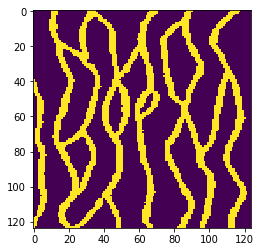

In [10]:
TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
#TI, TI_filename = mps.trainingimages.rot90()

plt.imshow(TI[:,:,0])

Run MPSLIB

In [11]:
O.ti = TI
#O.run_parallel()
O.run()

parallel: using 2 threads to simulate 4 realizations
parallel: with up to 2 relizations per thread
parallel: Using 2 of max 2 threads
__name__ = mpslib.mpslib
Thread:000, nr=2
Thread:001, nr=2
################################################################
#
# mpslib: mps_snesim_tree not found !!!!
# PLEASE ADD THE MPSLIB PROGRAM TO THE SYSTEM PATH
# OR ADD THE LOCATION OF THE MPSLIB PROGRAMS TO THE SYSTEM PATH
#
################################################################
#
#################################################################
# mpslib: mps_snesim_tree not found !!!!
# PLEASE ADD THE MPSLIB PROGRAM TO THE SYSTEM PATH
# OR ADD THE LOCATION OF THE MPSLIB PROGRAMS TO THE SYSTEM PATH
#
#################################################################


Exception: ignored

In [0]:
O.plot_reals()
O.plot_etype()